Visualization notebook where 2D parameter space slices can be viewed and qualitatively different initial conditions identified

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.axes as axes
import matplotlib.markers as mark
from CTRNNclass import *
from pyloricfitness import *

Note: I will want to first do a course search through wide section of slice, then finer data collection only around regions of interest. This is why resolution is modulatable.

In [2]:
par1 = 'theta1'
par2 = 'theta2'

par1_min = 2
par1_max = 3
par2_min = -6.5
par2_max = -5.5
par1_step = .01
par2_step = .01

par1_res = np.arange(par1_min,par1_max+.0001,par1_step)
par2_res = np.arange(par2_min,par2_max+.0001,par2_step)

Create a function which returns the parameter values put in for a point 

In [3]:
#Previous theta1 theta2 slice, not wide enough 
fitnessdata = np.loadtxt('slicetheta1theta2.dat')
print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater(fitnessdata, 0.15)
Z_Static = Z_Static.filled(0)
print(Z_Static)
Z_Disorder = np.ma.masked_less_equal(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
Z_Disorder = Z_Disorder.filled(0)
print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

(array([], dtype=int64), array([], dtype=int64))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


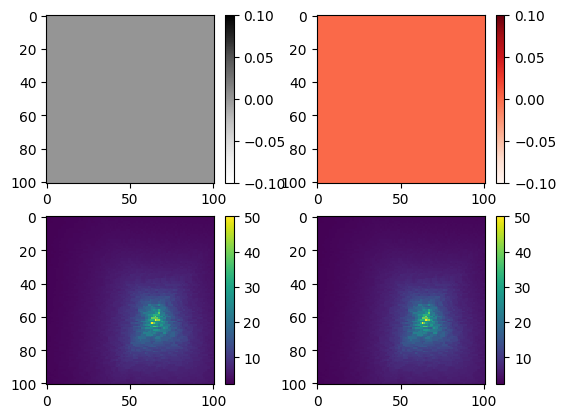

In [4]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
pos1 = ax1.imshow(Z_Static, cmap='Greys', interpolation='none')
fig.colorbar(pos1,ax=ax1)
pos2 = ax2.imshow(Z_Disorder, cmap='Reds', interpolation='none')
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.imshow(Z_Pyloric, cmap='viridis', interpolation='none')
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.imshow(fitnessdata, cmap='viridis', interpolation='none')
fig.colorbar(pos4,ax=ax4)

In [2]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = 0
par1_max = 5
par2_min = -9
par2_max = 0
par1_step = .01
par2_step = .01

par1_res = np.arange(par1_min,par1_max+.0001,par1_step)
par2_res = np.arange(par2_min,par2_max+.0001,par2_step)

In [3]:
#Theta1 Theta 3 slice with expanded area
# fitnessdata = np.loadtxt('slicetheta1theta3.dat').T
fitnessdata = np.loadtxt('slice.dat').T
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

(array([], dtype=int64), array([], dtype=int64))


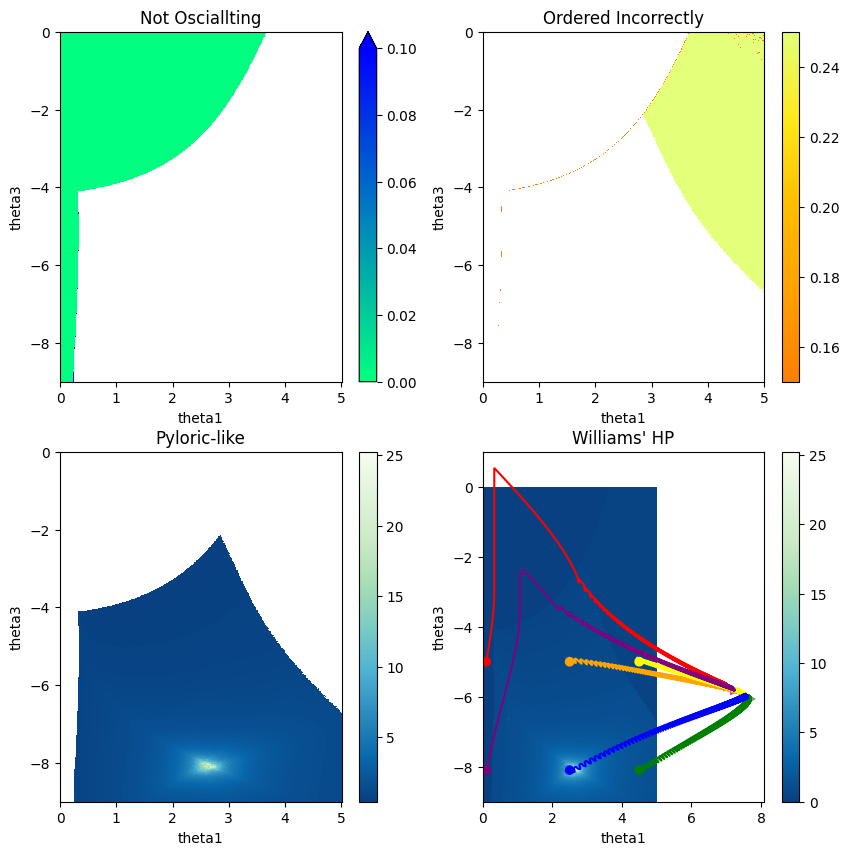

In [4]:
red = np.loadtxt('redparamtrack.dat')
orange = np.loadtxt('orangeparamtrack.dat')
yellow = np.loadtxt('yellowparamtrack.dat')
green = np.loadtxt('greenparamtrack.dat')
blue = np.loadtxt('blueparamtrack.dat')
purple = np.loadtxt('purpleparamtrack.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Williams' HP")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

RED: 0


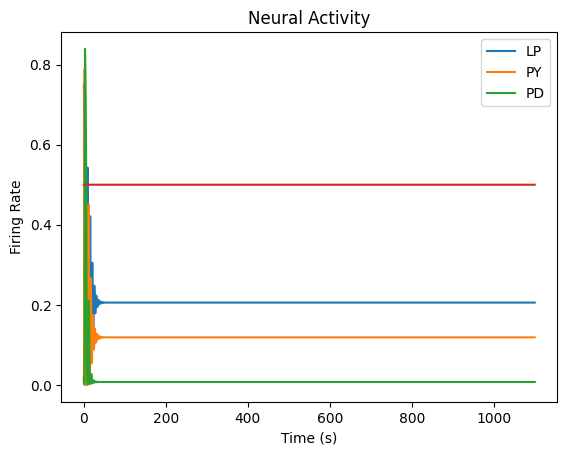

ORANGE: 0.6955363008668536


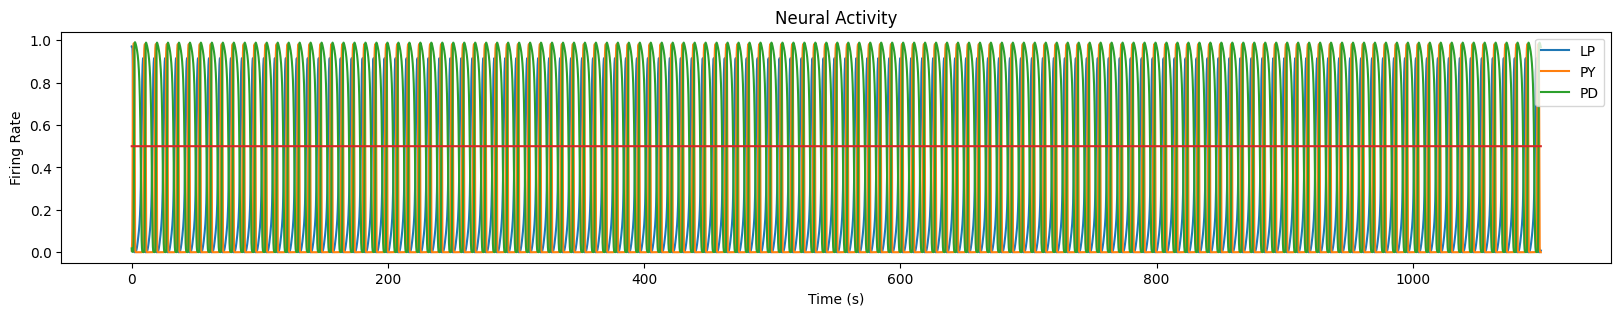

YELLOW: 0.25


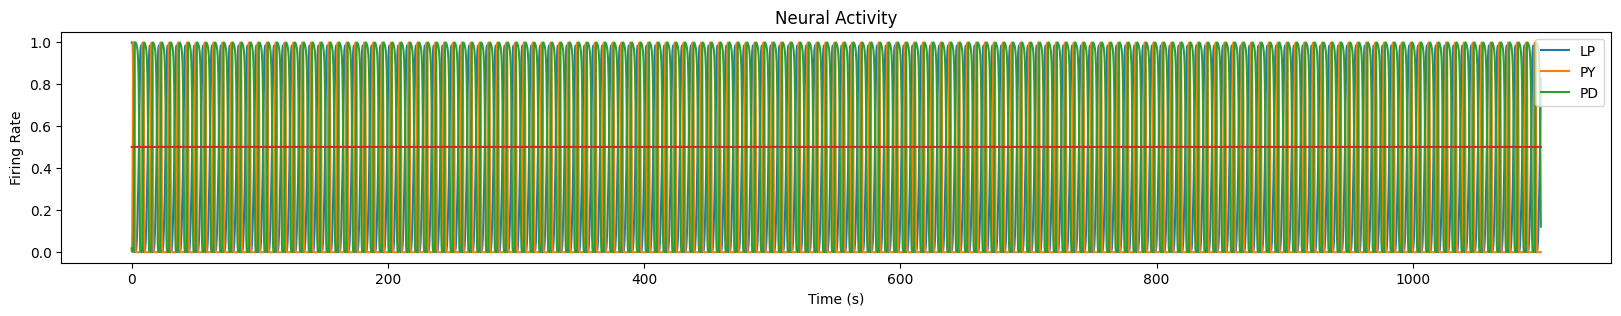

GREEN: 1.5026061512863376


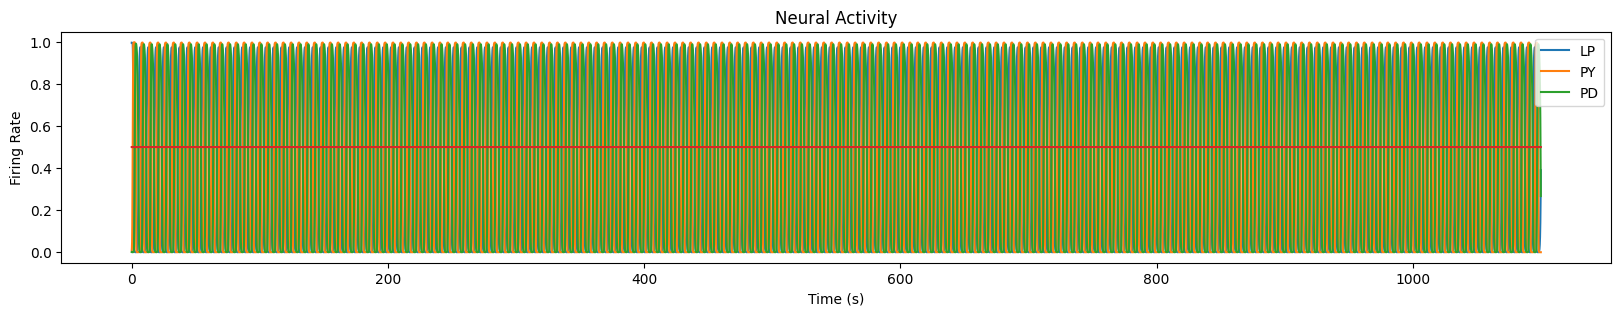

BLUE: 11.429888843722996


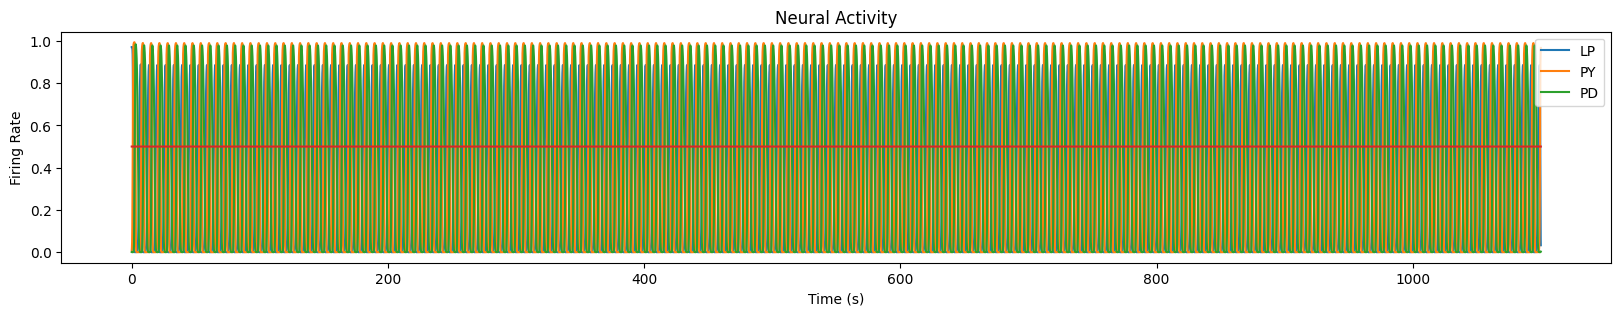

PURPLE: 0


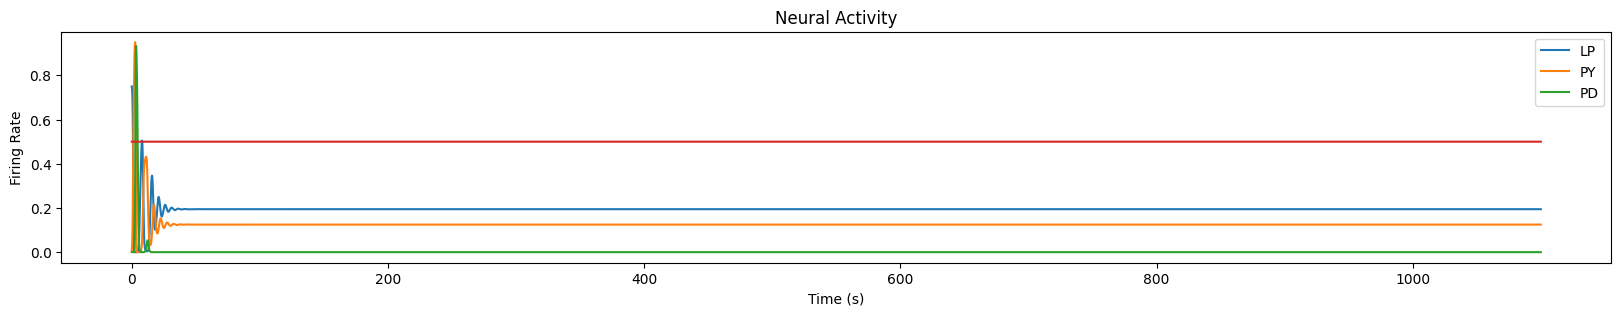

In [5]:
#Time Series for all initial points, without HP
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
dur = 1100
redC = CTRNN(3,.001,dur,None,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
redC.run(0)
feats = calcfeatures(redC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("RED:",fit)
redC.plot()
orangeC = CTRNN(3,.001,dur,None,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
orangeC.run(0)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("ORANGE:",fit)
orangeC.plot()
yellowC = CTRNN(3,.001,dur,None,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
yellowC.run(0)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("YELLOW:",fit)
yellowC.plot()
greenC = CTRNN(3,.001,dur,None,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
greenC.run(0)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("GREEN:",fit)
greenC.plot()
blueC = CTRNN(3,.001,dur,None,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
blueC.run(0)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("BLUE:",fit)
blueC.plot()
purpleC = CTRNN(3,.001,dur,None,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
purpleC.run(0)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("PURPLE:",fit)
purpleC.plot()
#Fit calc still not consistent

In [4]:
def plot_limitcycle(per, feats_7):
    time = np.arange(per)
    for i in range(len(feats_7)):
        plt.plot(time,feats_7[i])
    plt.show()
    return

before: [ 0.1     -5.92321 -5.     ]
after: [ 7.10315017 -5.92321    -5.69318496]
RED: 0.25


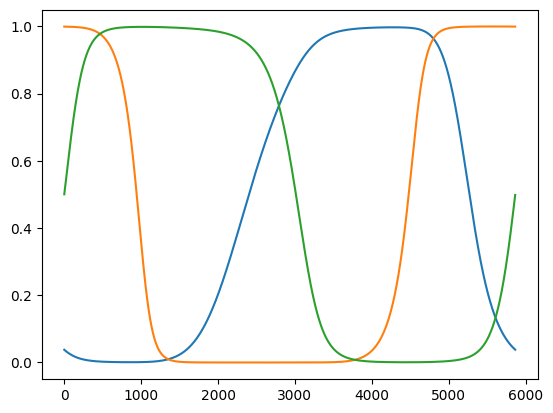

ORANGE: 0.25


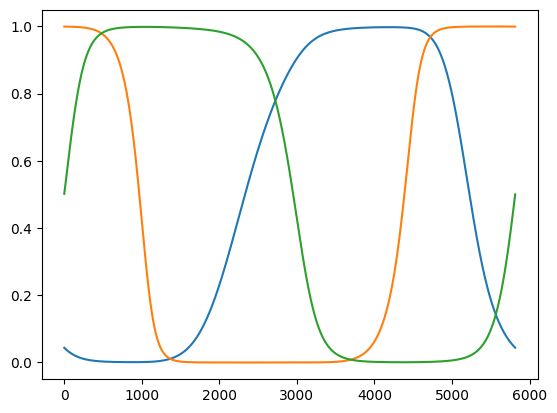

YELLOW: 0.25


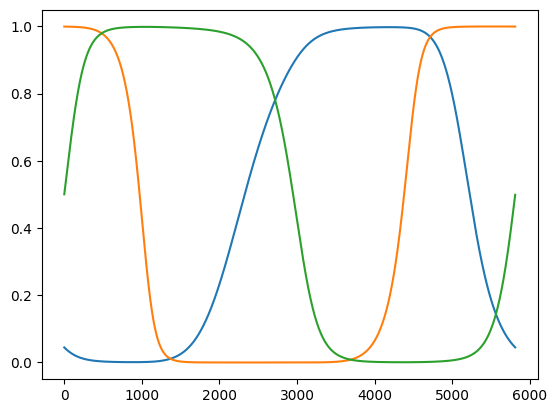

GREEN: 0.25


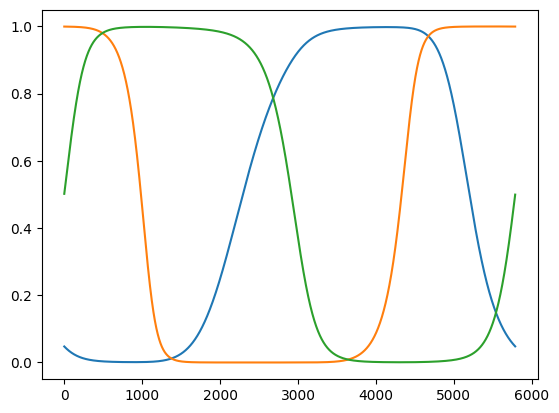

BLUE: 0.25


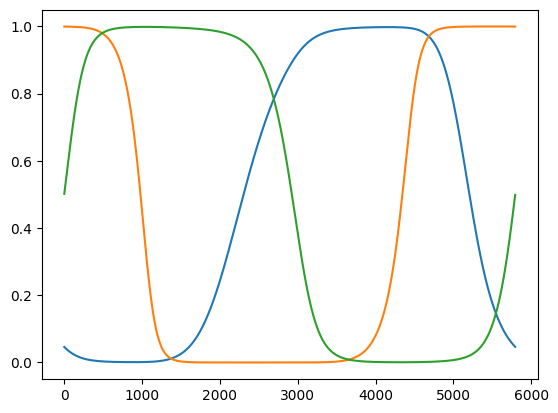

PURPLE: 0.25


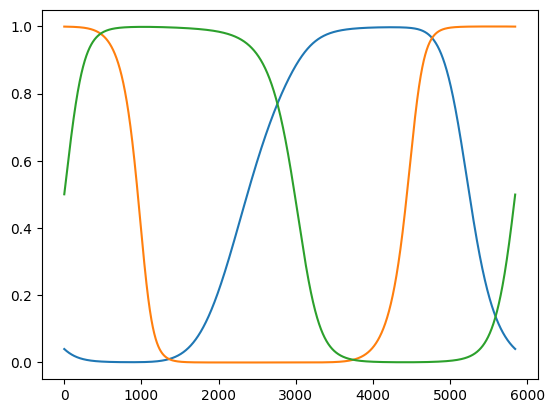

In [6]:
#With Williams HP, plotting only final limit cycle
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([20, 1, 20, 1,1,1,.25 , 0, .25 ,.75,1, .75 ,1 ,1,1]) #exclusive to theta 1 and 3
dur = 1100
redC = CTRNN(3,.001,dur,HPgenome,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
redC.run(0)
redC.Stepnum = 0
print("before:",redC.Biases)
redC.run(1)
print("after:",redC.Biases)
feats = calcfeatures(redC.ctrnn_record)
# print(feats)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("RED:",fit)
plot_limitcycle(feats[6],feats[7])
orangeC = CTRNN(3,.001,dur,HPgenome,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
orangeC.run(0)
orangeC.Stepnum=0
orangeC.run(1)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("ORANGE:",fit)
plot_limitcycle(feats[6],feats[7])
yellowC = CTRNN(3,.001,dur,HPgenome,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
yellowC.run(0)
yellowC.Stepnum=0
yellowC.run(1)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("YELLOW:",fit)
plot_limitcycle(feats[6],feats[7])
greenC = CTRNN(3,.001,dur,HPgenome,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
greenC.run(0)
greenC.Stepnum = 0
greenC.run(1)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("GREEN:",fit)
plot_limitcycle(feats[6],feats[7])
blueC = CTRNN(3,.001,dur,HPgenome,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
blueC.run(0)
blueC.Stepnum=0
blueC.run(1)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("BLUE:",fit)
plot_limitcycle(feats[6],feats[7])
purpleC = CTRNN(3,.001,dur,HPgenome,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
purpleC.run(0)
purpleC.Stepnum = 0
purpleC.run(1)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
print("PURPLE:",fit)
plot_limitcycle(feats[6],feats[7])

In [5]:
#Time series for all IC's with Williams' HP, plotting whole timeseries (how it got there)

neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([20, 1, 20, 1,1,1,.25 , .25, .25 ,.75,.75, .75 ,1 ,1,1])

neurongenome[9] = red[0,0]
neurongenome[11]= red[0,1]
print("RED:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = orange[0,0]
neurongenome[11] = orange[0,1]
print("ORANGE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = yellow[0,0]
neurongenome[11] = yellow[0,1]
print("YELLOW:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = green[0,0]
neurongenome[11] = green[0,1]
print("GREEN:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = blue[0,0]
neurongenome[11] = blue[0,1]
print("BLUE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = purple[0,0]
neurongenome[11] = purple[0,1]
print("PURPLE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))


NameError: name 'red' is not defined

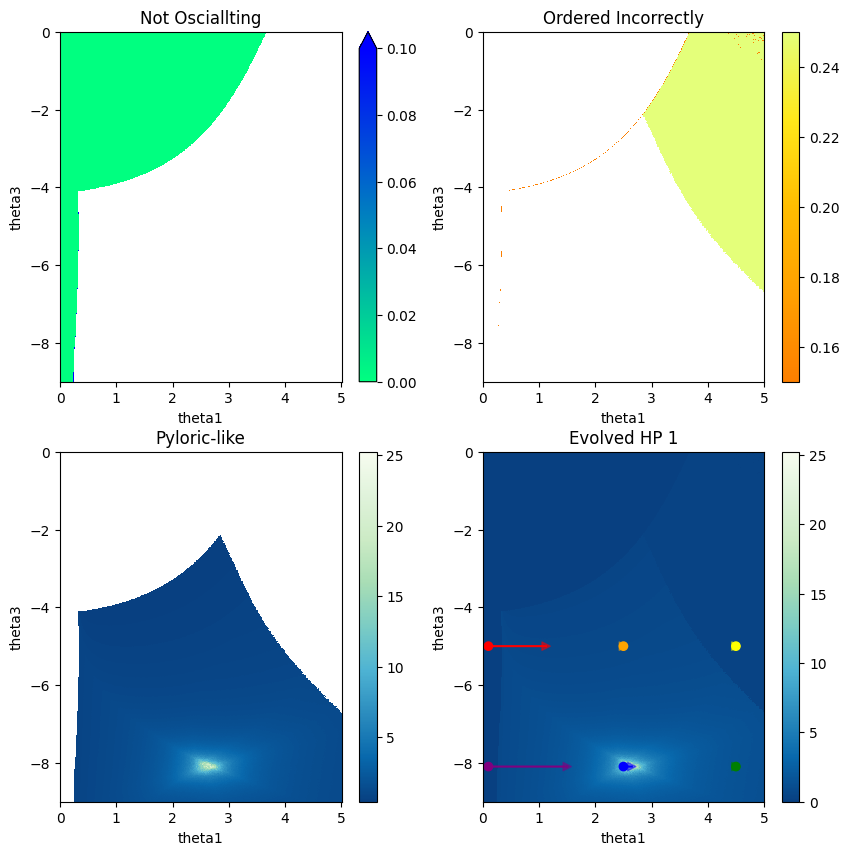

In [6]:
red = np.loadtxt('redparamtrack5.dat')
orange = np.loadtxt('orangeparamtrack5.dat')
yellow = np.loadtxt('yellowparamtrack5.dat')
green = np.loadtxt('greenparamtrack5.dat')
blue = np.loadtxt('blueparamtrack5.dat')
purple = np.loadtxt('purpleparamtrack5.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Evolved HP 1")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

RED:


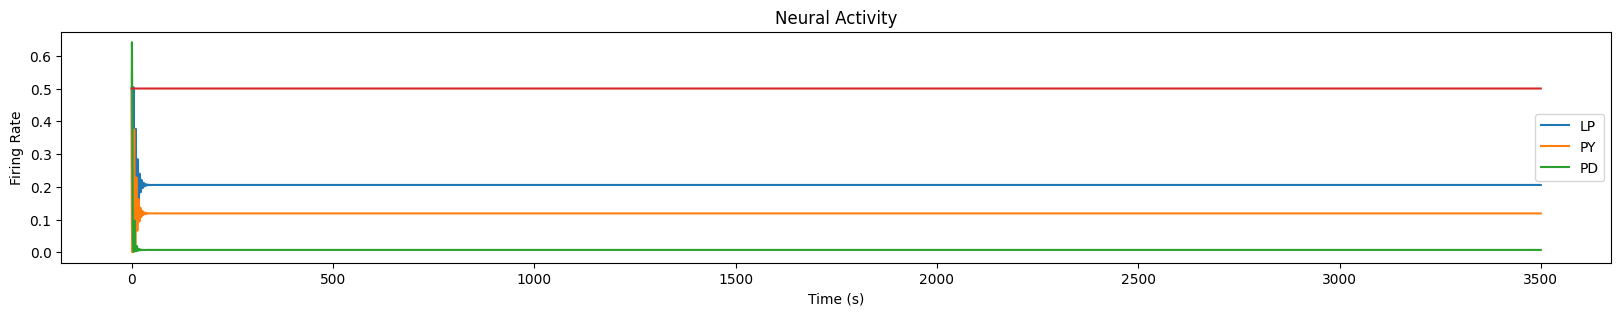

0.0
ORANGE:


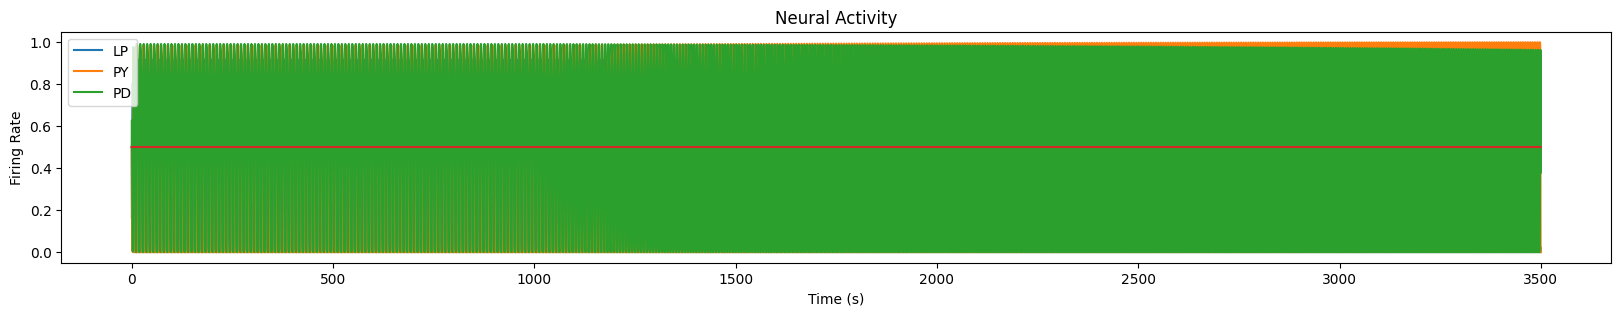

0.7551314902910642
YELLOW:


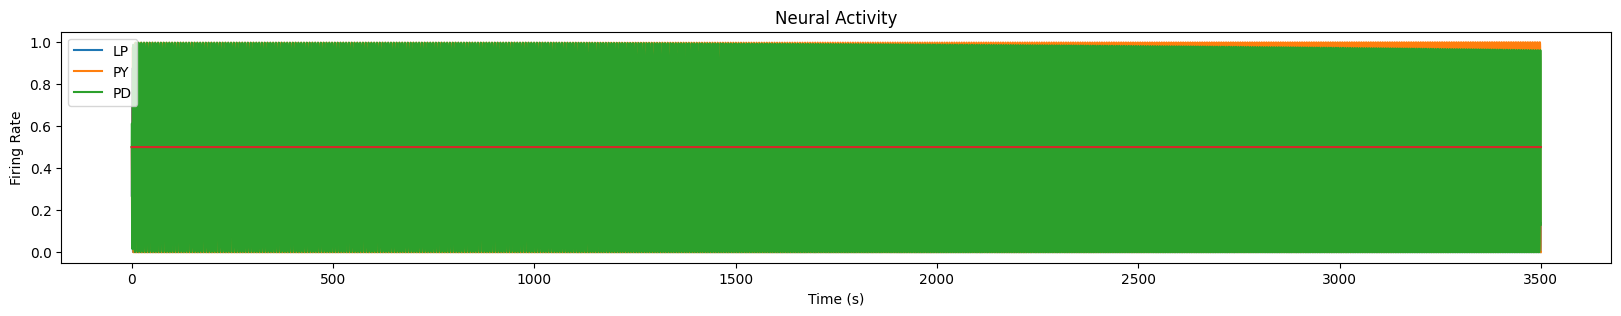

0.7136654623193313
GREEN:


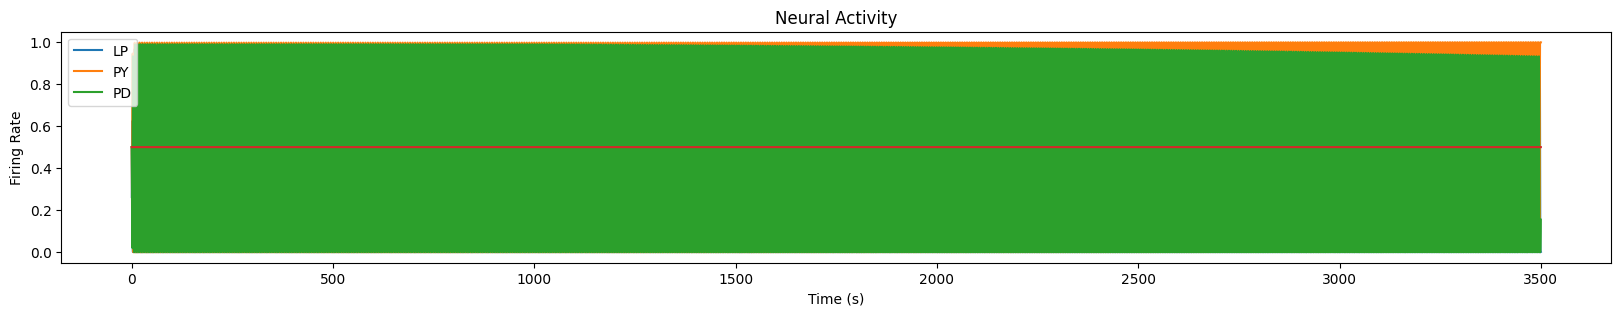

0.5940261815261305
BLUE:


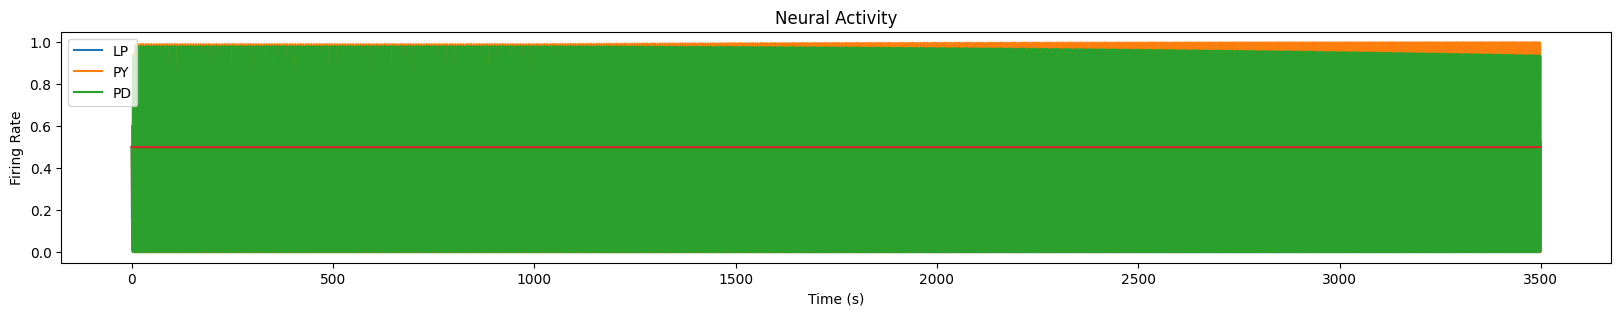

0.6159089656098311
PURPLE:


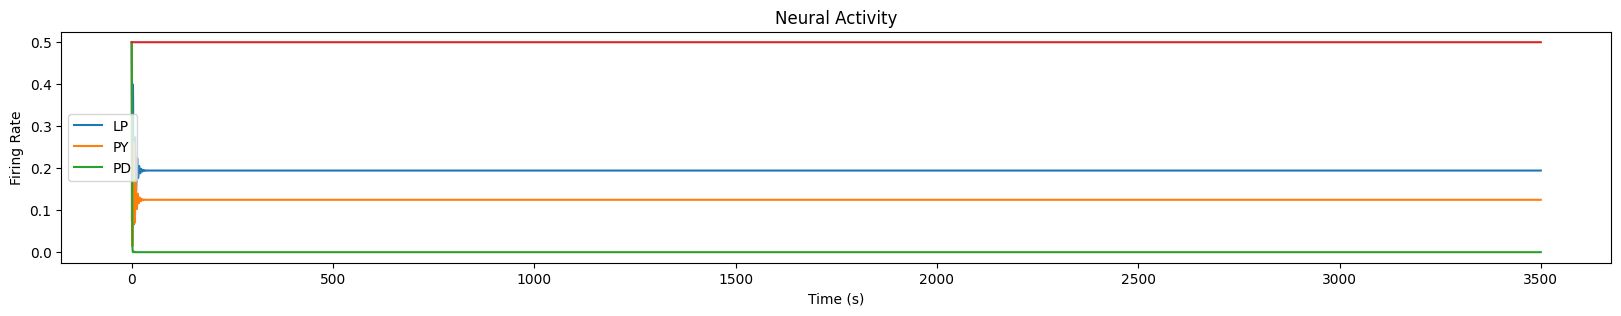

0.0


In [10]:
#Time series with evolved HP #5

neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([169.288,1, 115.095,1,1,1, 0.00625323,0, 0, 0.583122,1, 0.212414, 78,1, 113])

neurongenome[9] = red[0,0]
neurongenome[11]= red[0,1]
print("RED:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = orange[0,0]
neurongenome[11] = orange[0,1]
print("ORANGE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = yellow[0,0]
neurongenome[11] = yellow[0,1]
print("YELLOW:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = green[0,0]
neurongenome[11] = green[0,1]
print("GREEN:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = blue[0,0]
neurongenome[11] = blue[0,1]
print("BLUE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

neurongenome[9] = purple[0,0]
neurongenome[11] = purple[0,1]
print("PURPLE:")
print(pyloriclike(neurongenome,HPgenome,plotting=True))

#Doesn't match C++-generated, but might be C++ fault
 


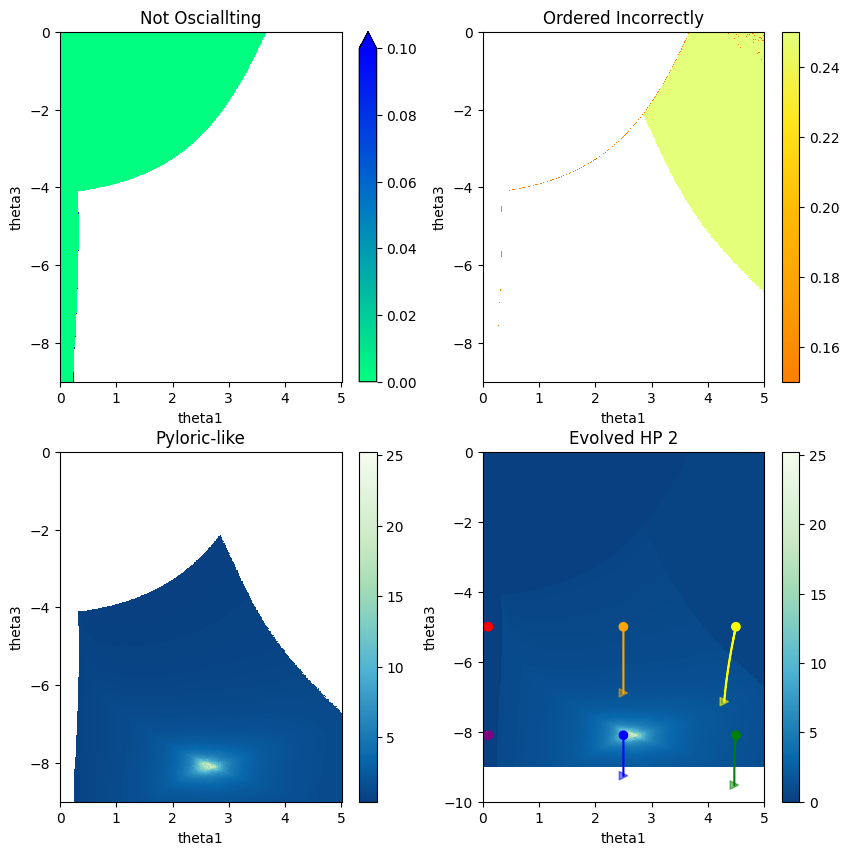

In [10]:

red = np.loadtxt('redparamtrack2.dat')
orange = np.loadtxt('orangeparamtrack2.dat')
yellow = np.loadtxt('yellowparamtrack2.dat')
green = np.loadtxt('greenparamtrack2.dat')
blue = np.loadtxt('blueparamtrack2.dat')
purple = np.loadtxt('purpleparamtrack2.dat')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Evolved HP 2")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()

before: [ 0.1     -5.92321 -5.     ]
after: [ 0.1     -5.92321 -5.     ]
RED: 0
before: [ 2.5     -5.92321 -5.     ]
after: [ 2.5        -5.92321    -7.03847121]


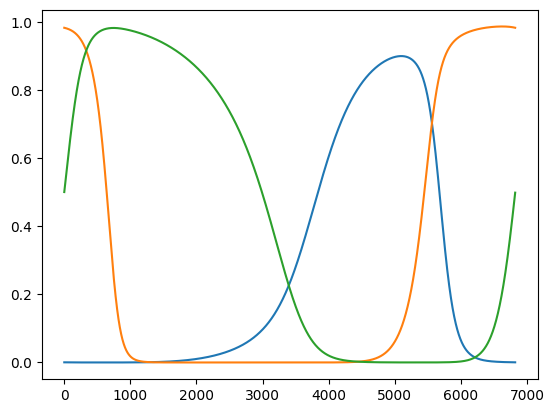

ORANGE: 1.6855152644166824
before: [ 4.5     -5.92321 -5.     ]
after: [ 4.29438687 -5.92321    -7.32170488]


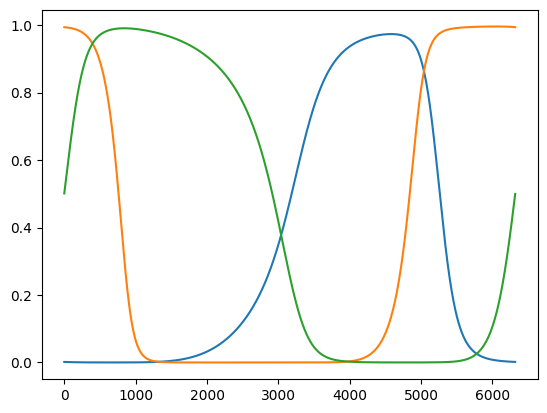

YELLOW: 1.6191363185914696
before: [ 4.5     -5.92321 -8.1    ]
after: [ 4.47928657 -5.92321    -9.64338398]


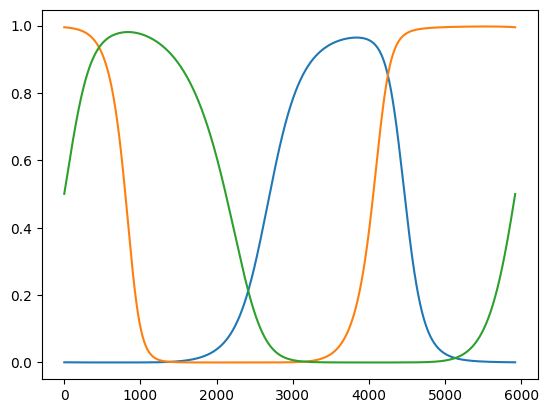

GREEN: 1.1604306033358547
before: [ 2.5     -5.92321 -8.1    ]
after: [ 2.5        -5.92321    -9.35062753]


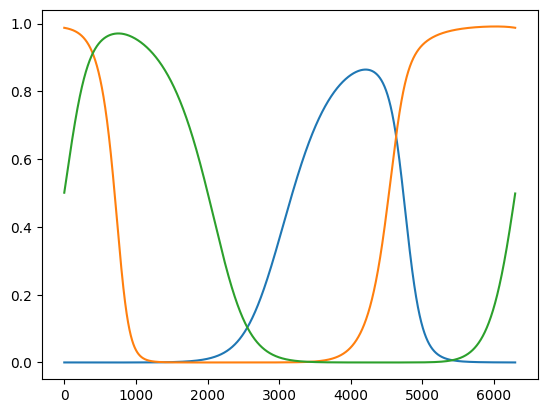

BLUE: 1.5720388300899837
before: [ 0.1     -5.92321 -8.1    ]
after: [ 0.1     -5.92321 -8.1    ]
PURPLE: 0


In [9]:
#With HP#2, plotting only final limit cycle
neurongenome = np.array([  1.25966,  11.7919 ,  -8.9466,  -14.1082  , 13.505  ,  15.8346   ,-4.73326, -14.9413 ,   7.13229  , 2.68606 , -5.92321,  -8.09309,   1.0782 ,   1.45534 , 1.713  ])
HPgenome = np.array([100,1, 176.115,1,1,1,0,0, 0, 0.968486,1, 0.627932 ,1,1, 27]) #exclusive to theta 1 and 3
dur = 1100
redC = CTRNN(3,.001,dur,HPgenome,neurongenome)
redC.setBiases(np.array([red[0,0] , -5.92321,  red[0,1]]))
# print(redC.Biases)
redC.run(0)
redC.Stepnum = 0
print("before:",redC.Biases)
redC.run(1)
print("after:",redC.Biases)
feats = calcfeatures(redC.ctrnn_record)
# print(feats)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("RED:",fit)
orangeC = CTRNN(3,.001,dur,HPgenome,neurongenome)
orangeC.setBiases(np.array([orange[0,0] , -5.92321,  orange[0,1]]))
orangeC.run(0)
orangeC.Stepnum=0
print("before:",orangeC.Biases)
orangeC.run(1)
print("after:",orangeC.Biases)
# print(orangeC.min_firingrate,' ',orangeC.max_firingrate)
# print(orangeC.ctrnn_record)
feats = calcfeatures(orangeC.ctrnn_record)
fit = 0
# print(feats)
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("ORANGE:",fit)
yellowC = CTRNN(3,.001,dur,HPgenome,neurongenome)
yellowC.setBiases(np.array([yellow[0,0] , -5.92321,  yellow[0,1]]))
yellowC.run(0)
yellowC.Stepnum=0
print("before:",yellowC.Biases)
yellowC.run(1)
print("after:",yellowC.Biases)
feats = calcfeatures(yellowC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("YELLOW:",fit)
greenC = CTRNN(3,.001,dur,HPgenome,neurongenome)
greenC.setBiases(np.array([green[0,0] , -5.92321,  green[0,1]]))
greenC.run(0)
greenC.Stepnum = 0
print("before:",greenC.Biases)
greenC.run(1)
print("after:",greenC.Biases)
feats = calcfeatures(greenC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("GREEN:",fit)
blueC = CTRNN(3,.001,dur,HPgenome,neurongenome)
blueC.setBiases(np.array([blue[0,0] , -5.92321,  blue[0,1]]))
blueC.run(0)
blueC.Stepnum=0
print("before:",blueC.Biases)
blueC.run(1)
print("after:",blueC.Biases)
feats = calcfeatures(blueC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("BLUE:",fit)
purpleC = CTRNN(3,.001,dur,HPgenome,neurongenome)
purpleC.setBiases(np.array([purple[0,0] , -5.92321,  purple[0,1]]))
purpleC.run(0)
purpleC.Stepnum = 0
print("before:",purpleC.Biases)
purpleC.run(1)
print("after:",purpleC.Biases)
feats = calcfeatures(purpleC.ctrnn_record)
fit = 0
if(feats[6]!= 0):
    fit = pyloriclike_fromfeats(feats[0],feats[1],feats[2],feats[3],feats[4],feats[5],feats[6])
    plot_limitcycle(feats[6],feats[7])
print("PURPLE:",fit)

#Not matching up with C++ final points